<a href="https://colab.research.google.com/github/kolikaran1992/Neural-Networks/blob/main/Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A single layer of a neural network consists of two operations
1. Linearly transforming the data and adding some bias
2. Applying a non linearity

A full network is able to approximate complicated non linear functions

In [ ]:
import numpy as np
import pandas as pd 
import time
import imageio

SEED = 49

import matplotlib.pyplot as plt
plt.rcParams.update({'axes.titlesize': 20, 
                     'axes.labelsize': 15,
                     'xtick.labelsize':10,
                     'ytick.labelsize':10
                     })

# PREPARE DATA

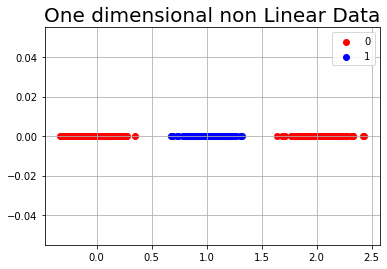

In [ ]:
## prepare one dimensional data
n = 100
X = np.r_[np.random.normal(loc=0, scale=0.15, size=n), 
          np.random.normal(loc=1, scale=0.15, size=n),
          np.random.normal(loc=2, scale=0.15, size=n)]

y = np.array([0]*n + [1]*n + [0]*n)
X = np.expand_dims(X, axis=1)

colors = ['red', 'blue']
plt.title('One dimensional non Linear Data')
for cls in np.unique(y):
    idxs = np.where(y == cls)
    plt.scatter(X[idxs, 0], np.zeros(X[idxs].shape), color=colors[cls],
                label=cls)
plt.legend()
plt.grid()
plt.show()

We need to seperate this data in two classes, a linear classifier will fail to do so but a non linear classifier will succeed. Neural networks are one such class of classifiers, let's see how a neural network does so

This data can be seperated by adding the following
1. Sigmoid of data centered at 1.5
2. Sigmoid of data centered at 0.5

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

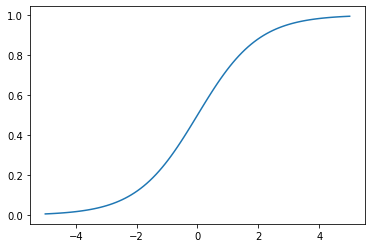

In [ ]:
x = np.linspace(-5,5,100)
plt.plot(x, sigmoid(x))

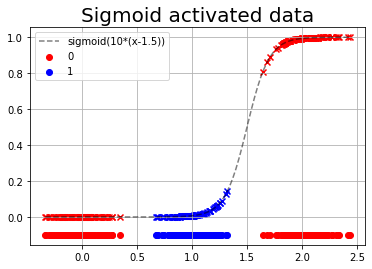

In [ ]:
wt = 10
sig_X_right = sigmoid(wt*(X-1.5))

plt.title('Sigmoid activated data')
for cls in np.unique(y):
    idxs = np.where(y == cls)
    plt.scatter(X[idxs, 0], np.zeros(X[idxs].shape)-0.1, color=colors[cls],
                label=cls, alpha=1)
    plt.scatter(X[idxs, 0], sig_X_right[idxs, 0], color=colors[cls], marker='x')

x = np.linspace(X.min(), X.max(), 100)
plt.plot(x, sigmoid(wt*(x-1.5)), ls='--', color='black', 
         label='sigmoid({}*(x-1.5))'.format(wt),
         alpha=0.5)
    #plt.scatter(X[idxs, 0], sig_X_left[idxs, 0], color=colors[cls], marker='*')
    #plt.scatter(X[idxs, 0], sig_X_left[idxs, 0]+sig_X_right[idxs, 0], color=colors[cls], marker='8')
plt.legend()
plt.grid()
plt.show()

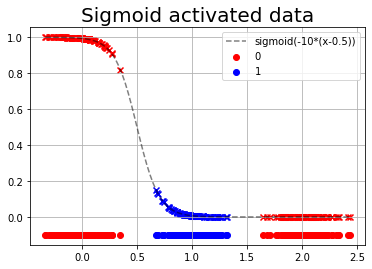

In [ ]:
wt = 10
sig_X_left = sigmoid(-wt*(X-0.5))

plt.title('Sigmoid activated data')
for cls in np.unique(y):
    idxs = np.where(y == cls)
    plt.scatter(X[idxs, 0], np.zeros(X[idxs].shape)-0.1, color=colors[cls],
                label=cls, alpha=1)
    plt.scatter(X[idxs, 0], sig_X_left[idxs, 0], color=colors[cls], marker='x')

x = np.linspace(X.min(), X.max(), 100)
plt.plot(x, sigmoid(-wt*(x-0.5)), ls='--', color='black', 
         label='sigmoid(-{}*(x-0.5))'.format(wt),
         alpha=0.5)
    #plt.scatter(X[idxs, 0], sig_X_left[idxs, 0], color=colors[cls], marker='*')
    #plt.scatter(X[idxs, 0], sig_X_left[idxs, 0]+sig_X_right[idxs, 0], color=colors[cls], marker='8')
plt.legend()
plt.grid()
plt.show()

The solid points are original data points, the crosses are data points after sigmoid activation

Now if we add these two activations we will get the data as below

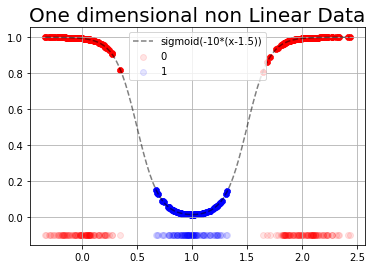

In [ ]:
plt.title('One dimensional non Linear Data')
for cls in np.unique(y):
    idxs = np.where(y == cls)
    plt.scatter(X[idxs, 0], np.zeros(X[idxs].shape)-0.1, color=colors[cls],
                label=cls, alpha=0.1)
    #plt.scatter(X[idxs, 0], sig_X_right[idxs, 0], color=colors[cls], marker='x')
    #plt.scatter(X[idxs, 0], sig_X_left[idxs, 0], color=colors[cls], marker='*')
    plt.scatter(X[idxs, 0], sig_X_left[idxs, 0]+sig_X_right[idxs, 0], color=colors[cls], marker='8')

x = np.linspace(X.min(), X.max(), 100)
plt.plot(x, sigmoid(-wt*(x-0.5))+sigmoid(wt*(x-1.5)), ls='--', color='black', 
         label='sigmoid(-{}*(x-1.5))'.format(wt),
         alpha=0.5)

plt.legend()
plt.grid()
plt.show()

And lo and behold, a nice little smiley face. This data is linearly seperable in two dimensions. 

The above operations can be broken down as below
1. Neuron one in hidden layer shifts data by 1.5 to the left and mutliplies the result by 10, finally a sigmoid activation is applied
2. Neuron two in hidden layer shifts the data by 0.5 to the left and multiplies the result by -10, finally a sigmoid activation is applied
3. A single neuron in the output layer multiplies the result from both the previous neurons by 1 and shifts the data by 0 and adds them

If we think of the two activated data points as being on seperate axes, the plot will look something as below

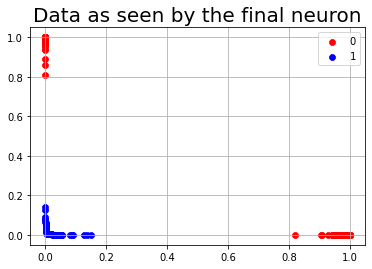

In [ ]:
plt.title('Data as seen by the final neuron')
for cls in np.unique(y):
    idxs = np.where(y == cls)
    #plt.scatter(X[idxs, 0], sig_X_right[idxs, 0], color=colors[cls], marker='x')
    #plt.scatter(X[idxs, 0], sig_X_left[idxs, 0], color=colors[cls], marker='*')
    plt.scatter(sig_X_left[idxs, 0], sig_X_right[idxs, 0], color=colors[cls], marker='8', label=cls)

plt.legend()
plt.grid()
plt.show()

# TRANSFORMING THE MATHEMATICAL OPERATIONS TO A NEURAL NETWORK

The hidden layer has two neurons
1. First one scales the data by 10 and shifts the origin to the left by 15
2. The second neuron scales the data by -10 and shifts the origin to the right by 5

Finally non linearity (sigmoid in this example) is applied to both the neurons seperately

In [ ]:
# apply linear transformation
W = np.array([[10], [-10]])
b = np.array([[-15], [5]])
W, b

(array([[ 10],
        [-10]]), array([[-15],
        [  5]]))

In [ ]:
lin_trans_data = np.matmul(W, X.T).T

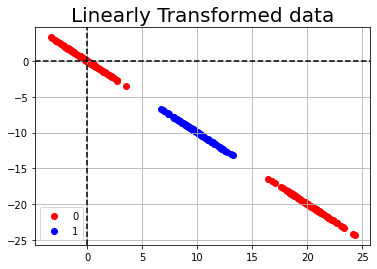

In [ ]:
## plot transformed data

colors = ['red', 'blue']
plt.title('Linearly Transformed data')
for cls in np.unique(y):
    idxs = np.where(y == cls)
    plt.scatter(lin_trans_data[idxs, 0], 
                lin_trans_data[idxs, 1], color=colors[cls],
                label=cls)
    # plt.scatter(X[idxs, 0], np.zeros(X[idxs].shape),
    #             color=colors[cls],marker='x', alpha=0.2)
plt.legend()
plt.axhline(0, ls='--', color='black')
plt.axvline(0, ls='--', color='black')
plt.grid()
plt.show()

The next step is to add some bias

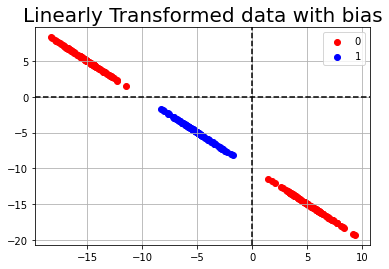

In [ ]:
## plot transformed data
lin_trans_data_plus_bias = (lin_trans_data.T + b).T

plt.title('Linearly Transformed data with bias')
for cls in np.unique(y):
    idxs = np.where(y == cls)
    plt.scatter(lin_trans_data_plus_bias[idxs, 0], 
                lin_trans_data_plus_bias[idxs, 1], color=colors[cls],
                label=cls)
    # plt.scatter(X[idxs, 0], np.zeros(X[idxs].shape),
    #             color=colors[cls],marker='x', alpha=0.2)
plt.legend()
plt.grid()
plt.axhline(0, ls='--', color='black')
plt.axvline(0, ls='--', color='black')
plt.show()

Intuitively, this data becomes linearly seperable if blue points are shifted off the axes of the line on which the data is spread

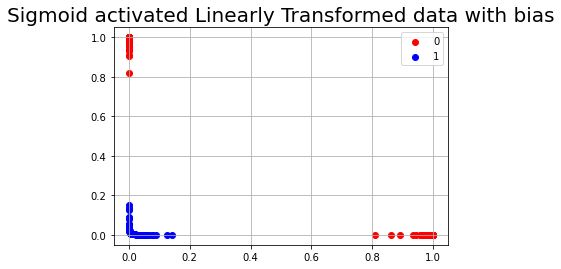

In [ ]:
## plot transformed data

lin_trans_data_plus_bias_with_sig = sigmoid(lin_trans_data_plus_bias)

colors = ['red', 'blue']
plt.title('Sigmoid activated Linearly Transformed data with bias')
for cls in np.unique(y):
    idxs = np.where(y == cls)
    plt.scatter(lin_trans_data_plus_bias_with_sig[idxs, 0], 
                lin_trans_data_plus_bias_with_sig[idxs, 1], color=colors[cls],
                label=cls)
    # plt.scatter(X[idxs, 0], np.zeros(X[idxs].shape),
    #             color=colors[cls],marker='x', alpha=0.2)
plt.legend()
plt.grid()
plt.show()

# OBSERVE HOW DATA CHANGES WITH EACH EPOCH

In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [ ]:
def network():
    inp_layer = tf.keras.layers.Input(shape=(1,),
                                       name='input', dtype=tf.float32)
    hidden_1 = tf.keras.layers.Dense(2, activation='sigmoid', name='hidden_1')(inp_layer)
    output = tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')(hidden_1)
    return tf.keras.Model(inputs = [inp_layer], outputs=[output, hidden_1], name='exp')

In [ ]:
model = network()
model.summary()

Model: "exp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1)]               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 2)                 4         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE,
                                          from_logits=False)

In [ ]:
loss([[0],[0],[1]], [[0.6], [0.6], [0.2]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.9162906, 0.9162906, 1.6094373], dtype=float32)>

In [ ]:
lr = 1e-1
optimizer = tf.keras.optimizers.Adam(
    learning_rate=lr)

In [ ]:
def gen():
    for idx in range(len(X)):
        yield X[idx, :], [y[idx]]

In [ ]:
dataset = tf.data.Dataset.from_generator(gen, 
                               output_types=(tf.float32, tf.float32),
                               output_shapes=((1, ), (1, ))).batch(32)

In [ ]:
def step(X_batch, y_batch):
    with tf.GradientTape() as tape:
        y_batch_pred, hidden_act = model([X_batch], training=True)
        batch_loss = loss(y_batch, y_batch_pred)
        grads = tape.gradient(batch_loss, 
                              model.trainable_variables)
    return batch_loss, hidden_act, grads

In [ ]:
def train_loop(model, dataset):
    hidden_acts = []
    y_true = []
    losses = []
    for X_batch, y_batch in dataset.as_numpy_iterator():
        batch_loss, hidden_act, grads = step(X_batch, y_batch)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        hidden_acts.append(hidden_act.numpy())
        y_true.append(y_batch)
        losses.append(batch_loss.numpy())
    
    return {'losses': np.concatenate(losses, axis=0), 
            'hidden_activations' :np.concatenate(hidden_acts, axis=0), 
            'y_true': np.concatenate(y_true, axis=0)}


In [ ]:
%time meta = train_loop(model, dataset)

CPU times: user 134 ms, sys: 6.13 ms, total: 140 ms
Wall time: 121 ms


In [151]:
def plot_acts(meta, title=''):
    acts = meta['hidden_activations']
    y_true = meta['y_true']
    fig = plt.figure()
    plt.title(title)
    for cls in np.unique(y_true):
        idxs = np.where(y == cls)
        plt.scatter(acts[idxs, 0], acts[idxs, 1], label=cls,
                    color=colors[int(cls)])
    
    plt.xlabel('neuron 1')
    plt.ylabel('neuron 2')
    plt.grid()
    plt.legend()

    _ = fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    del fig
    return image


epoch 1 done in 0.20s
epoch 2 done in 0.20s
epoch 3 done in 0.19s
epoch 4 done in 0.19s
epoch 5 done in 0.19s
epoch 6 done in 0.19s
epoch 7 done in 0.20s
epoch 8 done in 0.19s
epoch 9 done in 0.19s
epoch 10 done in 0.21s
epoch 11 done in 0.19s
epoch 12 done in 0.19s
epoch 13 done in 0.20s
epoch 14 done in 0.19s
epoch 15 done in 0.18s
epoch 16 done in 0.19s
epoch 17 done in 0.20s
epoch 18 done in 0.21s
epoch 19 done in 0.21s
epoch 20 done in 0.20s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


epoch 21 done in 0.19s
epoch 22 done in 0.21s
epoch 23 done in 0.21s
epoch 24 done in 0.38s
epoch 25 done in 0.20s
epoch 26 done in 0.22s
epoch 27 done in 0.20s
epoch 28 done in 0.20s
epoch 29 done in 0.21s
epoch 30 done in 0.19s
epoch 31 done in 0.19s
epoch 32 done in 0.19s
epoch 33 done in 0.18s
epoch 34 done in 0.18s
epoch 35 done in 0.19s
epoch 36 done in 0.19s
epoch 37 done in 0.19s
epoch 38 done in 0.19s
epoch 39 done in 0.19s
epoch 40 done in 0.18s
epoch 41 done in 0.18s
epoch 42 done in 0.18s
epoch 43 done in 0.18s
epoch 44 done in 0.18s
epoch 45 done in 0.19s
epoch 46 done in 0.17s
epoch 47 done in 0.19s
epoch 48 done in 0.18s
epoch 49 done in 0.19s
epoch 50 done in 0.19s


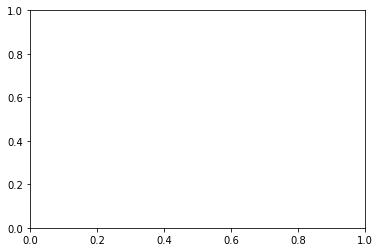

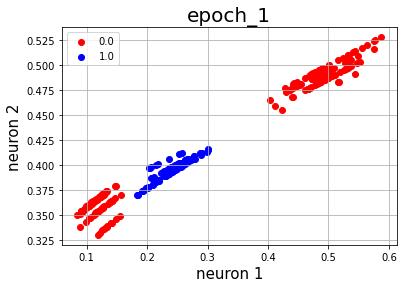

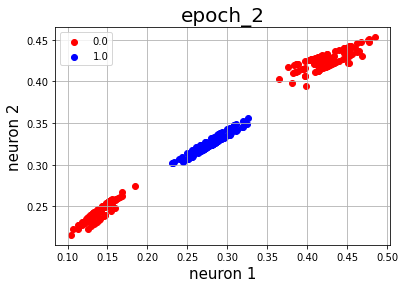

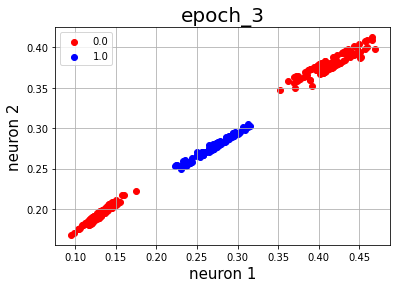

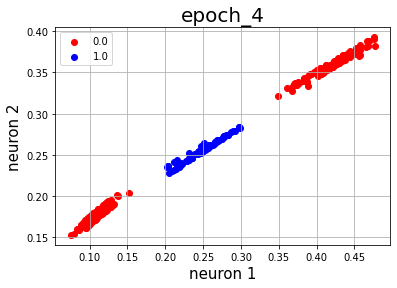

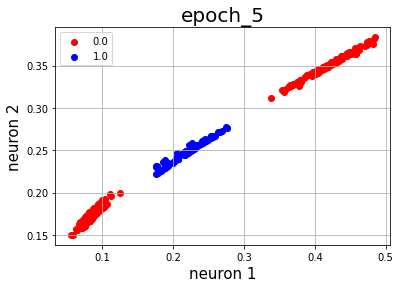

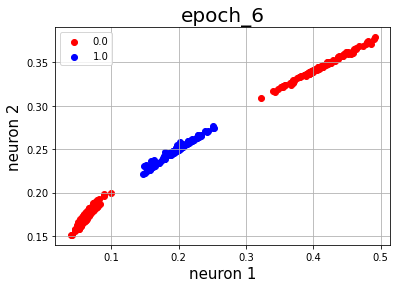

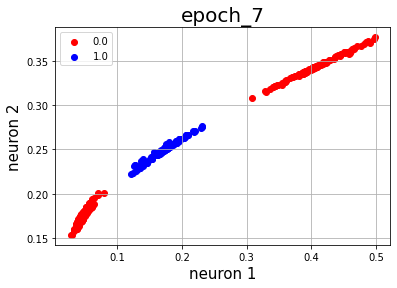

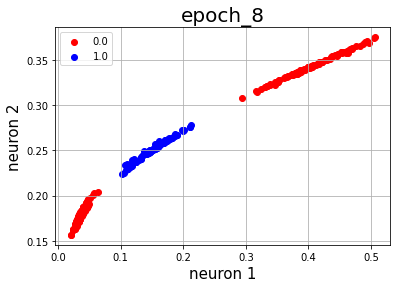

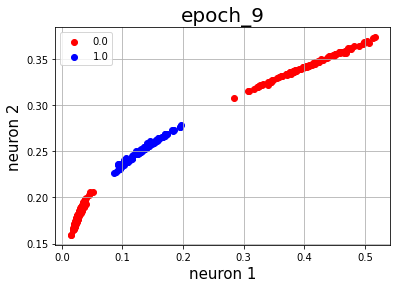

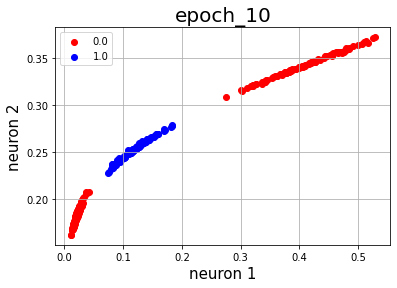

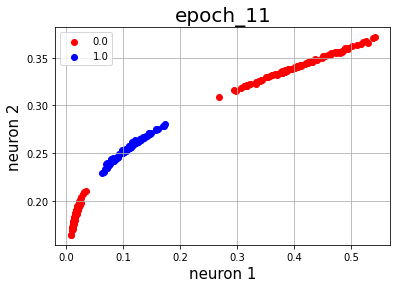

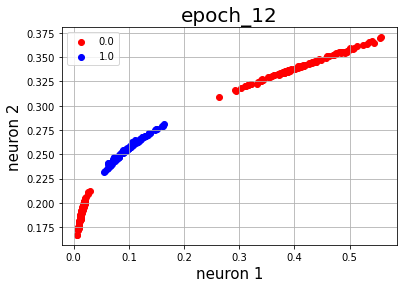

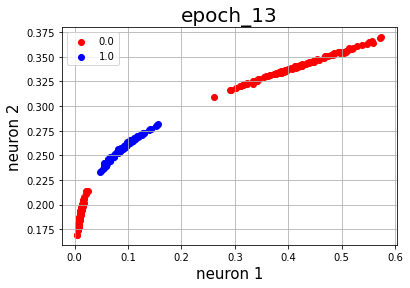

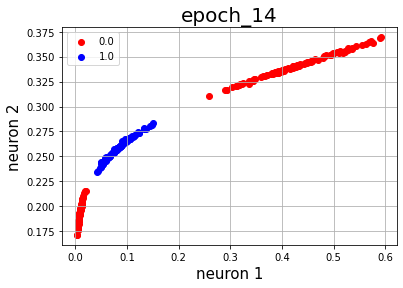

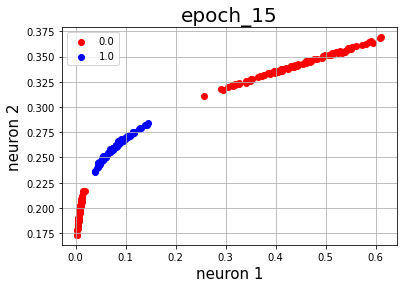

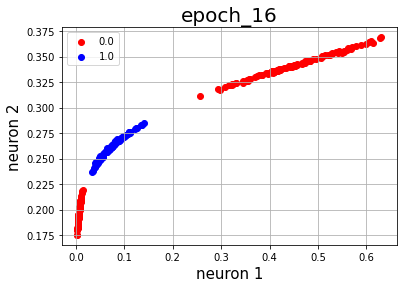

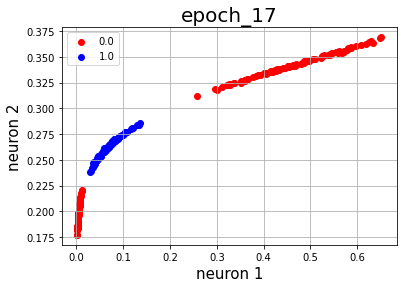

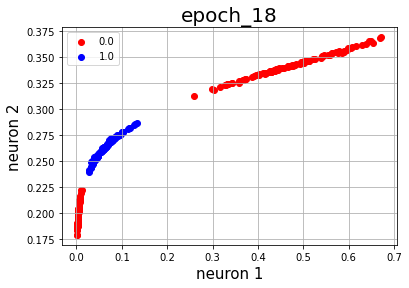

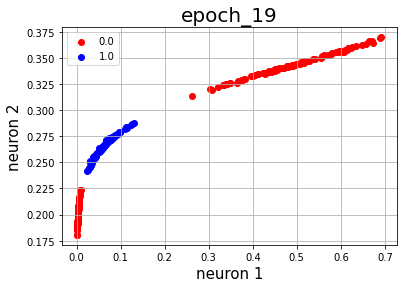

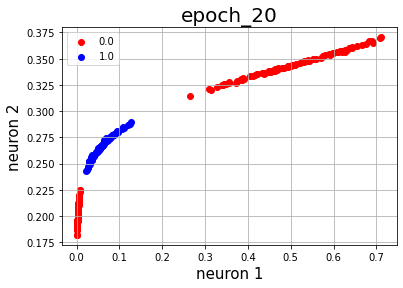

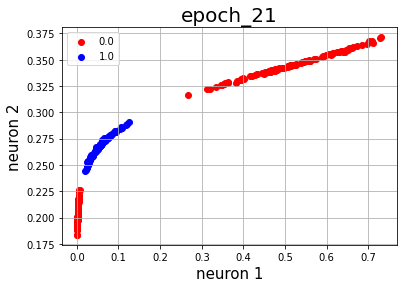

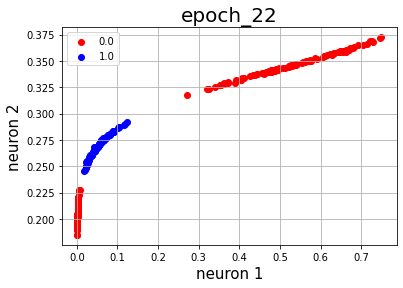

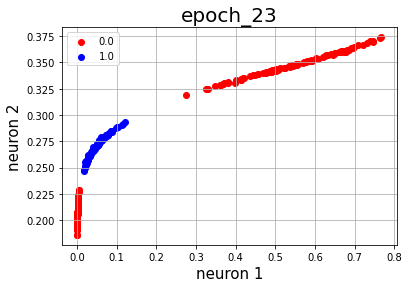

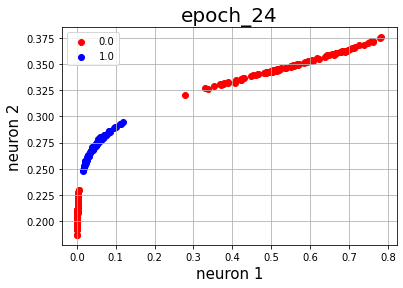

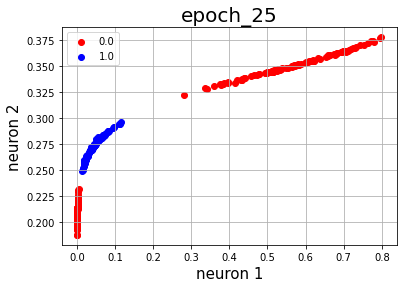

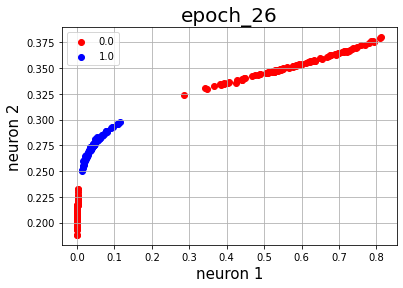

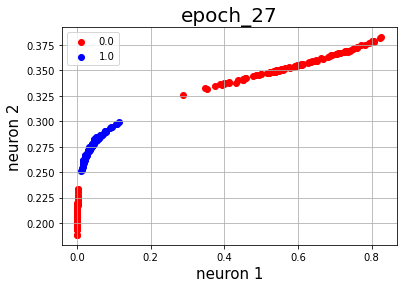

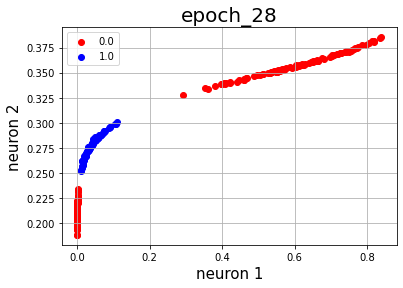

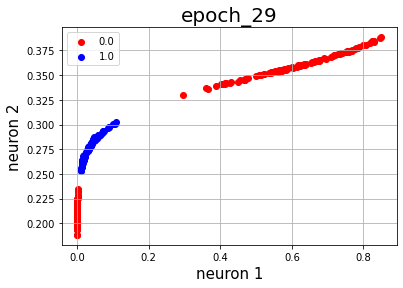

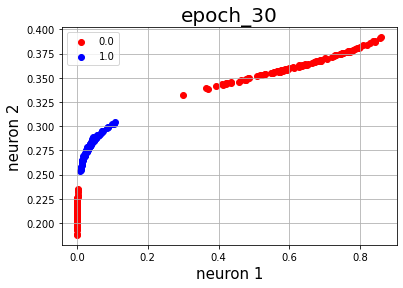

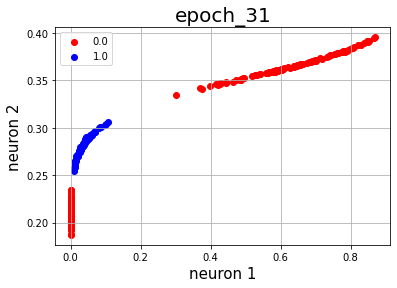

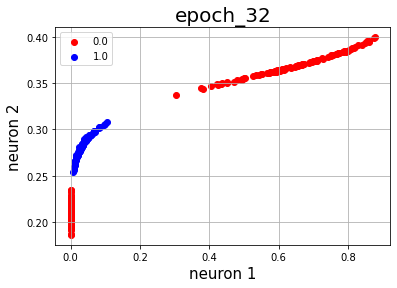

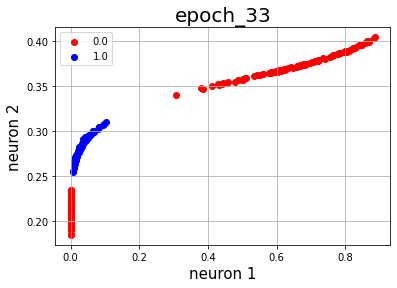

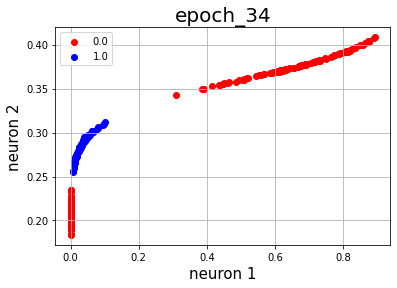

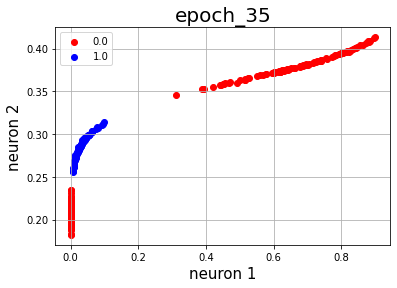

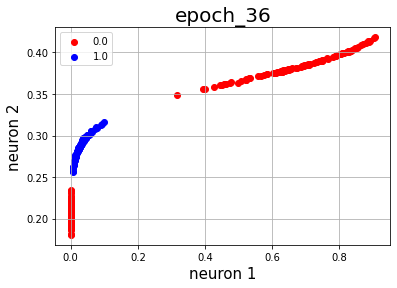

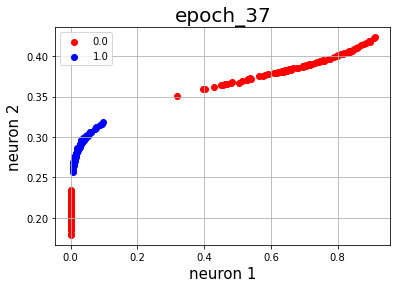

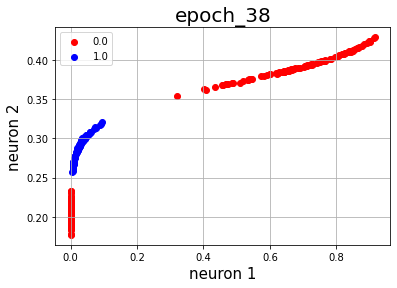

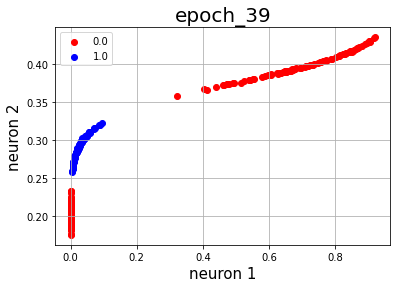

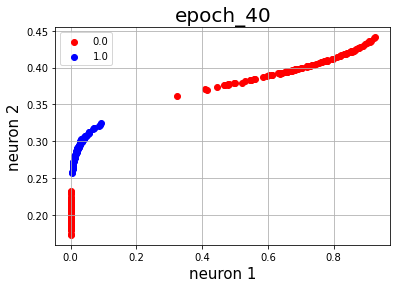

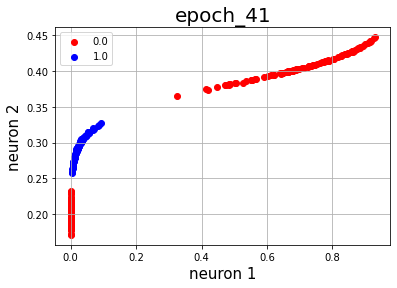

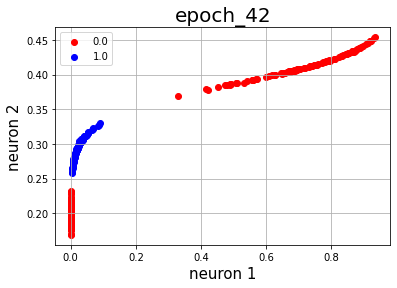

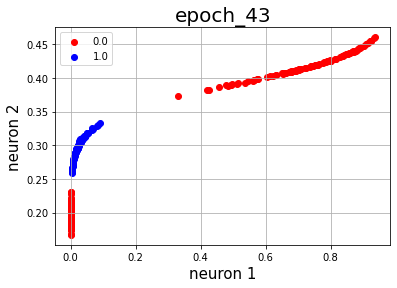

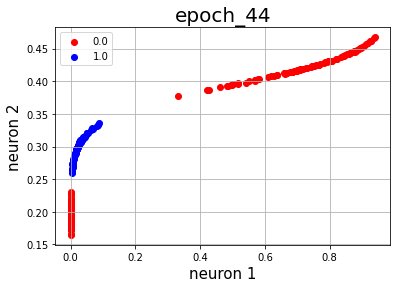

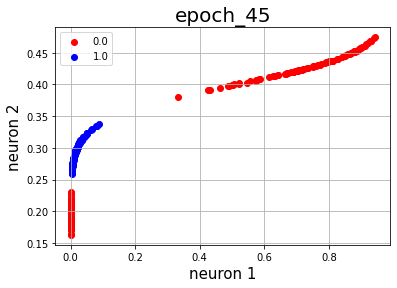

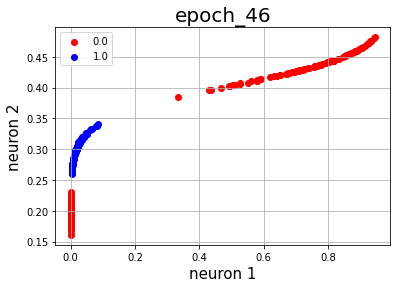

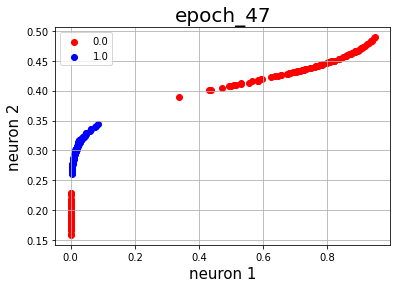

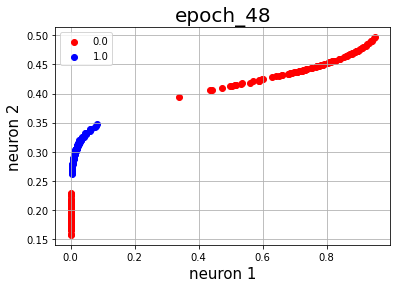

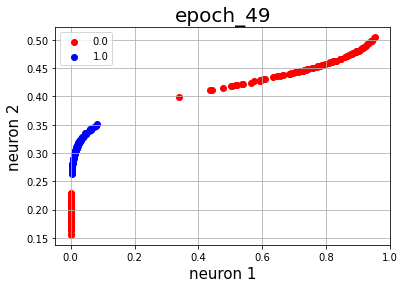

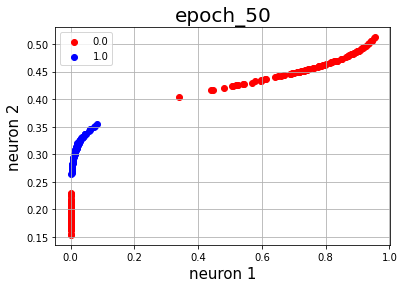

In [153]:
epochs = 50

images = []

fig, ax = plt.subplots()

avg_epoch_losses = []
model = network()
lr = 1.5
for epoch in range(epochs):
    start = time.time()
    loop_meta = train_loop(model, dataset)
    avg_epoch_losses.append(loop_meta['losses'].mean())
    image = plot_acts(loop_meta, 
                            title='epoch_{}'.format(epoch+1))
    images.append(image)
    print('epoch {} done in {:.2f}s'.format(epoch+1, time.time()-start))    

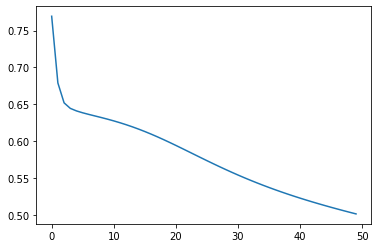

In [154]:
plt.plot(avg_epoch_losses)

In [155]:
len(images)

50

In [156]:
#kwargs_write = {'fps':0.1, 'quantizer':'nq'}
imageio.mimsave('./hidden_activations.gif', images, fps=20)

In [157]:
def show_gif(fname):
    import base64
    from IPython import display
    with open(fname, 'rb') as fd:
        b64 = base64.b64encode(fd.read()).decode('ascii')
    return display.HTML(f'<img src="data:image/gif;base64,{b64}" />')



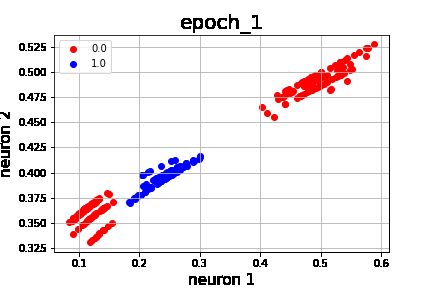

In [158]:
show_gif('/content/hidden_activations.gif')

Not exactly similar to the parameters found manually but close enough